<a href="https://colab.research.google.com/github/Minsung-commit/TIL/blob/master/%5B2021_08_02%5D_Python_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Machine() 정의

In [2]:
def Machine(x, w, b):
  y_hat = (w * x) + b
  return y_hat

  * x, w, b 객체 지정

In [3]:
x = np.array([1, 3, 5, 7, 9])
w = 2
b = 1

  * Machine() 테스트

In [4]:
Machine(x, w, b)

array([ 3,  7, 11, 15, 19])

# Gradien() 정의

  * def Gradient()

In [5]:
def Gradient(x, y, w, b):
  y_hat = Machine(x, w, b)

  dw = np.mean((y-y_hat) * (-2 * x))
  db = np.mean((y-y_hat) * (-2))

  return dw, db

* Gradient() 테스트

In [6]:
y = np.array([2, 4, 6, 8, 10])
dw, db = Gradient(x, y, w, b)

In [7]:
print('dw is', dw)
print('db is', db)

dw is 66.0
db is 10.0


* def Learning()

In [8]:
def Learning(x, y, w, b, step):
  dw, db = Gradient(x, y, w, b)

  uw = w - step * dw
  ub = b - step * db

  return uw, ub

* Learning()테스트

In [9]:
step = 0.05

uw, ub = Learning(x, y, w, b, step)

In [10]:
print('Updated_w is ', '%.3f' %uw)
print('Updated_b is ', '%.3f' %ub)

Updated_w is  -1.300
Updated_b is  0.500


In [11]:
# 데이터 읽어 오기

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
# Read testData.csv

In [14]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/testData.csv'

data = pd.read_csv(url)

In [15]:
#데이터 확인 및 시각화

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   inputs   5000 non-null   float64
 1   outputs  5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [17]:
data.head(5)

,inputs,outputs
0,0.2362,0.162367
1,0.9415,0.479356
2,0.3495,0.095733
3,0.3200,-0.111783
4,0.8335,0.386012


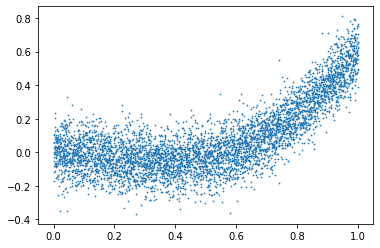

In [18]:
plt.scatter(data.inputs, data.outputs, s = 0.5)
plt.show()

* 3000번 학습 실행

In [19]:
w = 2
b = 3
step = 0.05

In [20]:
for i in range(0, 3000):
  uw, ub = Learning(data.inputs, data.outputs, w, b, step)
  w = uw
  b = ub

In [21]:
print('Learned_w is', '%.3f' % w)
print('Learned_w is', '%.3f' % b)

Learned_w is 0.505
Learned_w is -0.170


* 학습결과 회귀선 그리기

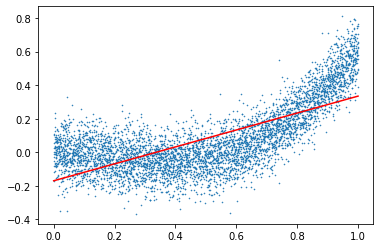

In [22]:
X = np.linspace(0, 1, 100)
Y = (w*X) + b

plt.scatter(data.inputs, data.outputs, s = 0.3)
plt.plot(X, Y, '-r', linewidth = 1.5)
plt.show()

## Error Visualization

* Gradient()에 Loss 추가

In [23]:
def Gradient(x, y, w, b):
  y_hat = Machine(x, w, b)

  dw = np.mean((y-y_hat) * (-2 * x))
  db = np.mean((y-y_hat) * (-2))
  Loss = np.mean((y-y_hat)**2)

  return dw, db, Loss

* Learning()에 Loss추가

In [29]:
def Learning(x, y, w, b, step):
  dw, db, Loss = Gradient(x, y, w, b)

  uw = w - step * dw
  ub = b - step * db

  Loss = Loss

  return uw, ub, Loss

* 학습 수행

In [30]:
w = 2
b = 3
step = 0.001
Error = []

In [38]:
for i in range(0, 3000):
  uw, ub, Loss = Learning(data.inputs, data.outputs, w, b, step)
  
  w = uw
  b = ub

  Error.append(Loss)

In [ ]:
Error

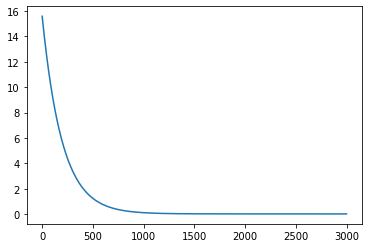

In [37]:
# Loss 감소 확인

Error[0:10]

plt.plot(Error)
plt.show()

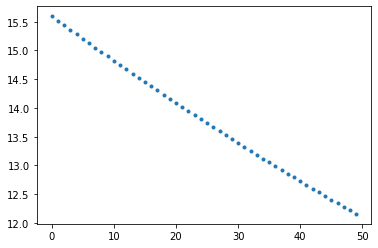

In [34]:
plt.plot(Error[0:50], '.')
plt.show()

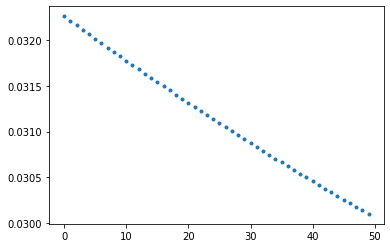

In [36]:
plt.plot(Error[1450:1500], '.')
plt.show()